# Simulation

**Librairies**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Fonction de répartition

Une fonction de répartition (aussi appelée fonction de distribution cumulative, ou CDF en anglais pour Cumulative Distribution Function) est une fonction qui décrit la probabilité qu'une variable aléatoire prenne une valeur inférieure ou égale à un certain seuil.

La fonction de répartition de la loi d'une variable aléatoire $X$ peut être approchée grâce à une suite $(x_n)$ de réalisations d’un échantillon de même loi que $X$, en remarquant que :

$$
F_X(t) = P(X \leq t) = \lim_{n \to +\infty} \frac{1}{n} \sum_{k=1}^{n} \chi_t(x_k)
$$

où $\chi_t(x)$ est la fonction indicatrice de l’intervalle $]-\infty, t]$ (c’est-à-dire que $\chi_t(x) = 1$ si $x \leq t$, sinon $\chi_t(x) = 0$).


Si le vecteur X contient les réalisations, on pourra utiliser les commandes suivantes pour avoir le nombre de réalisations inférieures ou égale à t

In [25]:
X = [1.2, 3.5, 0.7, 4.1, 2.8, 3.0, 1.5]

# Seuil
t = 2.5

# --- Méthode 1
count1 = len([x for x in X if x <= t])
print("Méthode 1 :", count1)

# --- Méthode 2
X_np = np.array(X)
count2 = np.sum(X_np <= t) # sum des True de X_np <= t = [ True False  True False ]
print("Méthode 2 (NumPy) :", count2)

Méthode 1 : 3
Méthode 2 (NumPy) : 3


**Pour estimer $P(X \leq t)$ :**

In [26]:
# --- Méthode 1
p1 = len([x for x in X if x <= t]) / len(X)

# --- Méthode 2
p2 = np.sum(X_np <= t) / len(X)

# --- Affichage amélioré
print(f"Seuil t = {t}")
print(f"Méthode 1                   : P(X ≤ t) = {p1:.4f}")
print(f"Méthode 2 (NumPy vectorisé) : P(X ≤ t) = {p2:.4f}")

Seuil t = 2.5
Méthode 1                   : P(X ≤ t) = 0.4286
Méthode 2 (NumPy vectorisé) : P(X ≤ t) = 0.4286


### Fonction de répartition empirique

La fonction ainsi obtenue est appelée **fonction de répartition empirique** de $X$.
On peut tracer la courbe de cette fonction en prenant une subdivision régulière de $N$ points dans un intervalle $[a, b]$.

≈ 68.9% des valeurs dans [μ - σ, μ + σ]
≈ 95.0% des valeurs dans [μ - 2σ, μ + 2σ]
≈ 99.6% des valeurs dans [μ - 3σ, μ + 3σ]


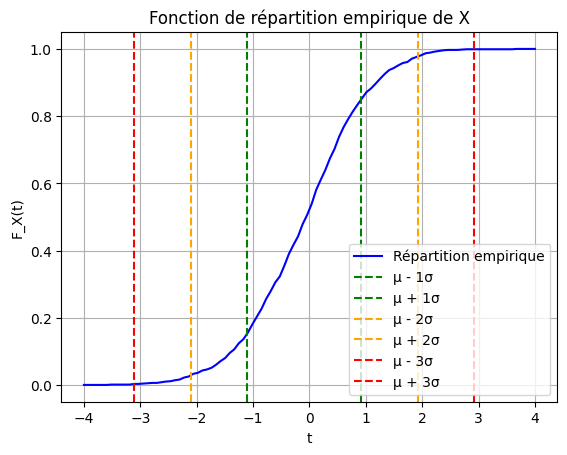

In [27]:
# Exemple : X suit une loi normale
X = np.random.normal(loc=0, scale=1, size=1000)

# Moyenne et écart-type
mu = np.mean(X)
sigma = np.std(X)

# Proportions dans 1σ, 2σ, 3σ autour de la moyenne
p1 = np.mean((X >= mu - sigma) & (X <= mu + sigma))
p2 = np.mean((X >= mu - 2*sigma) & (X <= mu + 2*sigma))
p3 = np.mean((X >= mu - 3*sigma) & (X <= mu + 3*sigma))

print(f"≈ {p1*100:.1f}% des valeurs dans [μ - σ, μ + σ]")
print(f"≈ {p2*100:.1f}% des valeurs dans [μ - 2σ, μ + 2σ]")
print(f"≈ {p3*100:.1f}% des valeurs dans [μ - 3σ, μ + 3σ]")

# Paramètres de tracé
a, b, N = -4, 4, 100
T = np.linspace(a, b, N)

# --- Répartition empirique (méthode rapide)
F = [np.sum(X <= t) / len(X) for t in T]

# Tracé
plt.plot(T, F, label="Répartition empirique", color='blue')

# Tracer les lignes verticales aux limites ±σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(mu - k*sigma, linestyle='--', color=color, label=f"μ - {k}σ")
    plt.axvline(mu + k*sigma, linestyle='--', color=color, label=f"μ + {k}σ")

plt.title("Fonction de répartition empirique de X")
plt.xlabel("t")
plt.ylabel("F_X(t)")
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Comparaison avec la fonction de répartition théorique

Si la loi de $X$ est connue (ex. loi normale), on peut comparer la courbe empirique avec la vraie fonction de répartition.

Pour une loi normale $\mathcal{N}(0, 1)$, on a :

$$
f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}
$$

Donc la fonction de répartition est :

$$
F_X(t) = \int_{-\infty}^t \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2} \, dx
$$

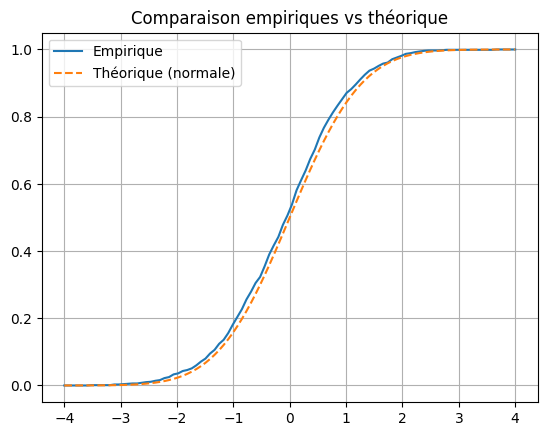

In [28]:
F_theo = norm.cdf(T)

plt.plot(T, F, label="Empirique")
plt.plot(T, F_theo, '--', label="Théorique (normale)")
plt.legend()
plt.title("Comparaison empiriques vs théorique")
plt.grid(True)
plt.show()

### Estimation d’une densité de probabilité à partir d’un échantillon

Il est souvent difficile d’estimer la **densité de probabilité** d’une variable aléatoire continue à partir d’un simple échantillon. Si une variable $X$ admet une densité $f_X(t)$ sur un intervalle $[a, b]$, alors on peut approximer cette densité par la probabilité qu’une valeur de l’échantillon tombe dans un petit intervalle autour de $t$, de largeur $h$. En pratique, on découpe l’intervalle $[a, b]$ en $N$ sous-intervalles de largeur $h = \frac{b - a}{N - 1}$ et on estime la densité en chaque point $t_k$ par la fréquence des valeurs de l’échantillon dans l’intervalle $[t_k, t_{k+1}]$, divisée par la largeur $h$. Cette approche permet d’obtenir une estimation discrète de la densité de $X$, qui peut être visualisée par un graphique.

Remarques :

* Cette méthode est une forme **d'histogramme lissé** : les hauteurs des barres sont divisées par la largeur $h$.
* Elle permet une **visualisation approximative** de la densité d’une loi, ici une **normale centrée réduite**.
* Le choix de $N$ est crucial : trop petit → courbe trop grossière ; trop grand → peu de données par intervalle.


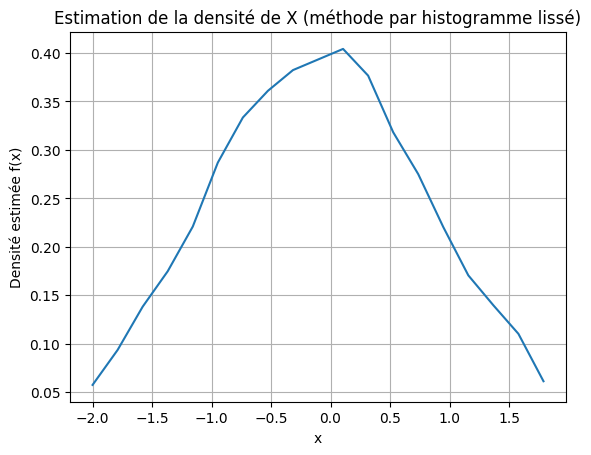

In [29]:
# Paramètres de l’estimation
a = -2      # borne inférieure de l’intervalle
b = +2      # borne supérieure de l’intervalle
N = 20      # nombre de subdivisions
h = (b - a) / (N - 1)  # largeur de chaque sous-intervalle

# Échantillon simulé : loi normale centrée réduite
X = np.random.normal(0, 1, 10000)

# Subdivisions de [a, b]
T = np.linspace(a, b, N)

# Estimation de la densité (méthode vectorisée)
F = np.zeros(N - 1)
for k in range(N - 1):
    F[k] = np.sum((T[k] <= X) & (X < T[k + 1])) / (len(X) * h)

# Tracé de la densité estimée
plt.plot(T[:-1], F)
plt.title("Estimation de la densité de X (méthode par histogramme lissé)")
plt.xlabel("x")
plt.ylabel("Densité estimée f(x)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de l’estimation
a = -2      # borne inférieure de l’intervalle
b = +2      # borne supérieure de l’intervalle
N = 20      # nombre de subdivisions
h = (b - a) / (N - 1)  # largeur de chaque sous-intervalle

# Échantillon simulé : loi normale centrée réduite
X = np.random.normal(0, 1, 10000)

# Subdivisions de [a, b]
T = np.linspace(a, b, N)

# Estimation de la densité (méthode vectorisée)
F = np.zeros(N - 1)
for k in range(N - 1):
    F[k] = np.sum((T[k] <= X) & (X < T[k + 1])) / (len(X) * h)

# Centres des intervalles pour affichage des barres
centres = (T[:-1] + T[1:]) / 2

# Tracé de la densité estimée avec barres
plt.bar(centres, F, width=h, edgecolor='black', alpha=0.6, label="Histogramme")
plt.plot(centres, F, 'r-', label="Lissage")
plt.title("Estimation de la densité de X (histogramme lissé)")
plt.xlabel("x")
plt.ylabel("Densité estimée f(x)")
plt.grid(True)
plt.legend()
plt.show()
